## Importing the Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Load the dataset

In [4]:
df = pd.read_csv('./Ecommerce Customers.csv')

### Working on Ecommerce customers dataset

* Average Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent by the customer on App in minutes
* Time on Website: Average time spent by the customer on Website in minutes
* Length of Membership: From how many years the customer has been a member.

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis(EDA)

we will explore the data and try to find some insights by visualizing the data properly, by using the Seaborn library functions such as

`Joint plot:`

* Time on Website vs Yearly Amount Spent
* Time on App vs  Yearly Amount Spent
* Time on App vs Length of membership

`Pair plot:` for the complete dataset

`Lmplot:` Length of Membership vs Yearly Amount Spent

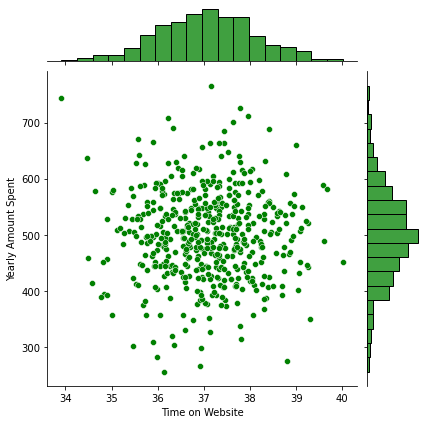

In [9]:
sns.jointplot(x='Time on Website' , y='Yearly Amount Spent', data=df,color = 'g' )

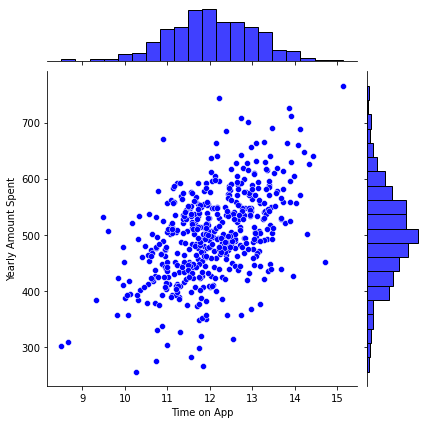

In [10]:
sns.jointplot(x='Time on App' , y='Yearly Amount Spent', data=df,color = 'b' )

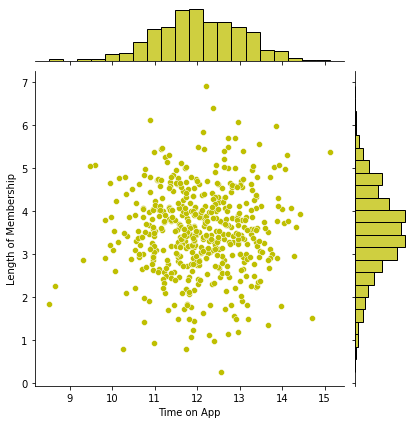

In [12]:
sns.jointplot(x='Time on App' , y='Length of Membership', data=df,color = 'y' )

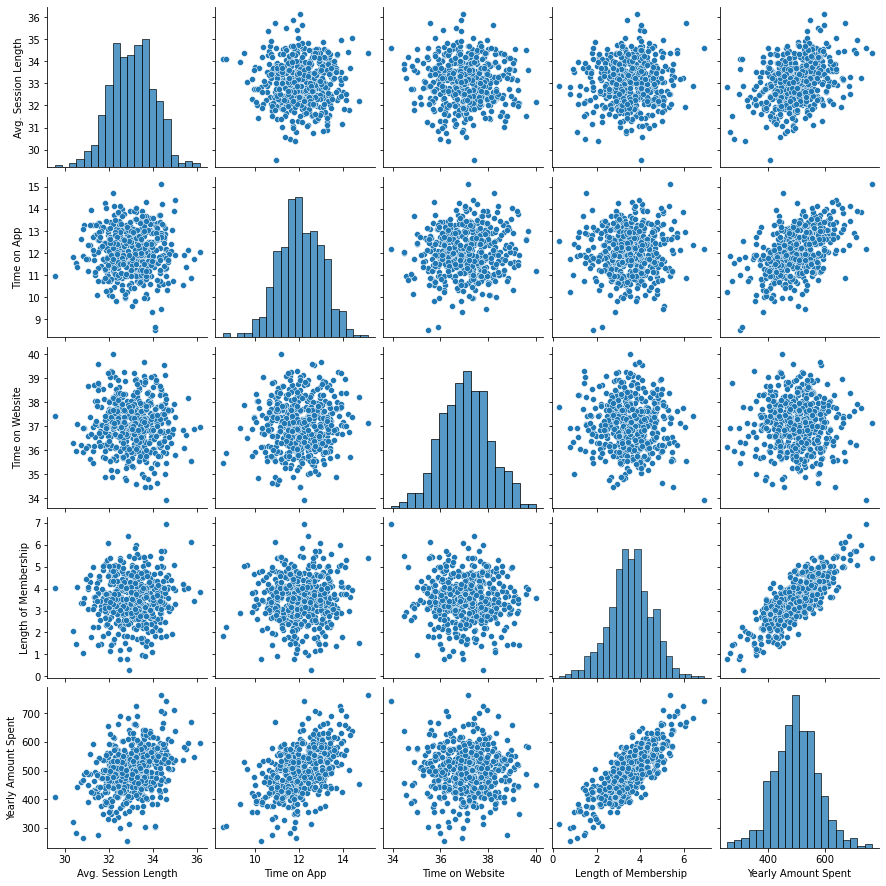

In [13]:
#pair plot for complete dataset
sns.pairplot(df)

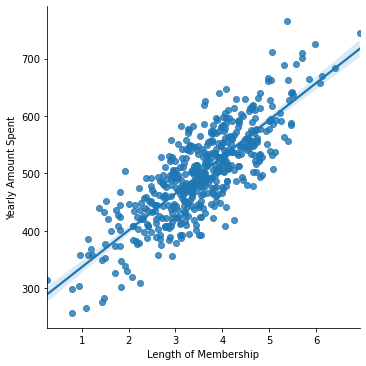

In [22]:
# based on the above plot, the most correleated feature with 'Yearly amount Spent' is 'Length of Membership'
# so creating a implot for Amount spend vs Length of membership

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = df)

## Splitting the Dataset for Training and Testing

In [28]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
# Separate Dependent and Independent Variable

X  = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [32]:
# split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.20,random_state = 105)

## Training the Model using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression()

In [43]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
#the coefficients of the model are
lr_model.coef_

array([25.78478056, 39.09892928,  0.71482351, 61.60959616])

## Predictions on Test Data

In [45]:
predictions = lr_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

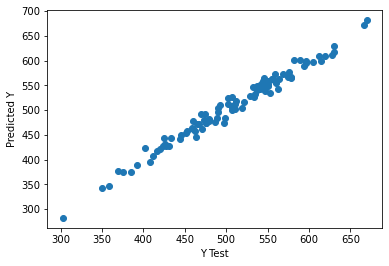

In [46]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [47]:
from sklearn import metrics

print(' MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMAE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

 MAE : 8.344472983315134
MSE: 110.50616311720763
RMAE: 10.512191166317688


E:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

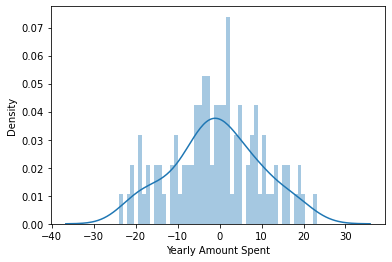

In [51]:
sns.distplot(y_test-predictions,bins=50)

## Observation

In [54]:
coeffecients = pd.DataFrame(lr_model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.784781
Time on App,39.098929
Time on Website,0.714824
Length of Membership,61.609596


* Keeping all other features constant, a one-unit increase in Avg. Session Length is associated with an increase of 25.78 total dollars spent.
* By Keeping all other features constant, a one-unit increase in Time on App is associated with an increase of 39.09 total dollars spent.
* Keeping all other features constant, a one-unit increase in Time on the Website is associated with an increase of 0.71 total dollars spent.
* Also, Keeping all other features constant, a one-unit increase in Length of Membership is associated with an increase of 61.60 total dollars spent.